# FL: Fish Lake
## Stats, mostly in xDEM
### Created new env: clone of *raster* from Linux box, called *raster_xdem* for the xdem package


In [1]:
# import packages 
# %matplotlib widget
# %matplotlib inline #have to remote this to get rid of the scikit-gstat warning with plotting... 

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# interactive plotting
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots # adding for subplots
import plotly.figure_factory as ff

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import csv 
import copy 
import os.path 

import geopandas as gpd
# import rasterio as rio
from rasterio import plot, mask
from rasterio.warp import calculate_default_transform, reproject, Resampling
import rioxarray
# import rasterstats

In [2]:
sns.set_theme()
plt.rcParams['figure.figsize'] = [12,6] #overriding size

In [3]:
!conda env list

# conda environments:
#
                         /home/lumbraca/mambaforge/envs/raster
                      *  /home/lumbraca/mambaforge/envs/raster_xdem
base                     /opt/miniconda3
python                   /opt/miniconda3/envs/python



In [4]:
# labels and cosntants 
# titles
cer_title = 'CER Small Domain'

# labels 
dce_label = 'distance to canopy edge (m)'
dah_label = 'diurnal anisotropic heat index'
slope_label = 'slope (degrees)'
aspect_label = 'aspect (degrees)'
snow_label = 'snow depth (m)'

dceclassdict = {1: 'Large Clusters', 2: 'Small Clusters', 3: 'Edges', 4: 'Small Gaps', 5: 'Large Gaps'}

In [5]:
ds = xr.open_dataset('/home/lumbraca/raster/data/fl_smalldomain_create_netcdf.nc')
# ds

### Proper reclassification groups

|group|name|DCE range|
|-|-|--:|
|group 1:|Large Gaps|3 <  DCE <=  8|
|group 2:|Small Gaps|1 <  DCE <=  3|
|group 3:|Edges|-1 <= DCE <=  1
|group 4:|Small Clusters|-3 <= DCE <= -1|
|group 5:|Large Clusters|      DCE <  -3|

In [6]:
# flatten everything to save time later
dce_flat=ds.dce.values.flatten()
dce_reclass_flat=ds.dce_reclass.values.flatten()

dah_flat=ds.dah.values.flatten()
dah_reclass_flat=ds.dah_reclass.values.flatten()

snowdepth_flat=ds.snowdepth.values.flatten()

dce_dahpos_reclass_flat=ds.dce_dahpos_reclass.values.flatten()
dce_dahneg_reclass_flat=ds.dce_dahneg_reclass.values.flatten()

In [7]:
# # Make groups for dce classifications
# # setting to larger values outside of distance ranges to avoid overwriting 
# largeclusters = ds.where(ds.dce_reclass == 100)
# smallclusters = ds.where(ds.dce_reclass == 200)
# canopyedges   = ds.where(ds.dce_reclass == 300)
# smallgaps     = ds.where(ds.dce_reclass == 400)
# largegaps     = ds.where(ds.dce_reclass == 500)

# # Make groups for dah classification 
# dahpos = ds.where(ds.dce_reclass ==  1)
# dahneg = ds.where(ds.dce_reclass == -1)

# # Flatten and remove nans -----------------------------------------------------------------------
# # dce
# largeclusters_flat = largeclusters.snowdepth.values.flatten()
# smallclusters_flat = smallclusters.snowdepth.values.flatten()
# canopyedges_flat   = canopyedges.snowdepth.values.flatten()
# smallgaps_flat     = smallgaps.snowdepth.values.flatten()
# largegaps_flat     = largegaps.snowdepth.values.flatten()

# largeclusters_flat = largeclusters_flat[~(np.isnan(largeclusters_flat))] # removing the nans 
# smallclusters_flat = smallclusters_flat[~(np.isnan(smallclusters_flat))]
# canopyedges_flat   = canopyedges_flat[~(np.isnan(canopyedges_flat))]
# smallgaps_flat     = smallgaps_flat[~(np.isnan(smallgaps_flat))]
# largegaps_flat     = largegaps_flat[~(np.isnan(largegaps_flat))]

# # dah
# dahpos_flat     = dahpos.snowdepth.values.flatten()
# dahpos_flat     = dahpos_flat[~(np.isnan(dahpos_flat))]

# dahneg_flat     = dahneg.snowdepth.values.flatten()
# dahneg_flat     = dahneg_flat[~(np.isnan(dahneg_flat))]



# # For pos vs neg groups -----------------------------------------------------------------------
# # first set the values for each of the two pos and neg datasets 
# largeclusters_dahpos = ds.where(ds.dce_dahpos_reclass == 100)
# smallclusters_dahpos = ds.where(ds.dce_dahpos_reclass == 200)
# canopyedges_dahpos   = ds.where(ds.dce_dahpos_reclass == 300)
# smallgaps_dahpos     = ds.where(ds.dce_dahpos_reclass == 400)
# largegaps_dahpos     = ds.where(ds.dce_dahpos_reclass == 500)

# largeclusters_dahneg = ds.where(ds.dce_dahneg_reclass == 100)
# smallclusters_dahneg = ds.where(ds.dce_dahneg_reclass == 200)
# canopyedges_dahneg   = ds.where(ds.dce_dahneg_reclass == 300)
# smallgaps_dahneg     = ds.where(ds.dce_dahneg_reclass == 400)
# largegaps_dahneg     = ds.where(ds.dce_dahneg_reclass == 500)


# # For pos vs neg groups 
# # dce pos dah
# largeclusters_dahpos_flat = largeclusters_dahpos.snowdepth.values.flatten()
# smallclusters_dahpos_flat = smallclusters_dahpos.snowdepth.values.flatten()
# canopyedges_dahpos_flat   = canopyedges_dahpos.snowdepth.values.flatten()
# smallgaps_dahpos_flat     = smallgaps_dahpos.snowdepth.values.flatten()
# largegaps_dahpos_flat     = largegaps_dahpos.snowdepth.values.flatten()

# largeclusters_dahpos_flat = largeclusters_dahpos_flat[~(np.isnan(largeclusters_dahpos_flat))] # removing the nans 
# smallclusters_dahpos_flat = smallclusters_dahpos_flat[~(np.isnan(smallclusters_dahpos_flat))]
# canopyedges_dahpos_flat   = canopyedges_dahpos_flat[~(np.isnan(canopyedges_dahpos_flat))]
# smallgaps_dahpos_flat     = smallgaps_dahpos_flat[~(np.isnan(smallgaps_dahpos_flat))]
# largegaps_dahpos_flat     = largegaps_dahpos_flat[~(np.isnan(largegaps_dahpos_flat))]

# # dce neg dah
# largeclusters_dahneg_flat = largeclusters_dahneg.snowdepth.values.flatten()
# smallclusters_dahneg_flat = smallclusters_dahneg.snowdepth.values.flatten()
# canopyedges_dahneg_flat   = canopyedges_dahneg.snowdepth.values.flatten()
# smallgaps_dahneg_flat     = smallgaps_dahneg.snowdepth.values.flatten()
# largegaps_dahneg_flat     = largegaps_dahneg.snowdepth.values.flatten()

# largeclusters_dahneg_flat = largeclusters_dahneg_flat[~(np.isnan(largeclusters_dahneg_flat))] # removing the nans 
# smallclusters_dahneg_flat = smallclusters_dahneg_flat[~(np.isnan(smallclusters_dahneg_flat))]
# canopyedges_dahneg_flat   = canopyedges_dahneg_flat[~(np.isnan(canopyedges_dahneg_flat))]
# smallgaps_dahneg_flat     = smallgaps_dahneg_flat[~(np.isnan(smallgaps_dahneg_flat))]
# largegaps_dahneg_flat     = largegaps_dahneg_flat[~(np.isnan(largegaps_dahneg_flat))]

## Box and Violin Plots

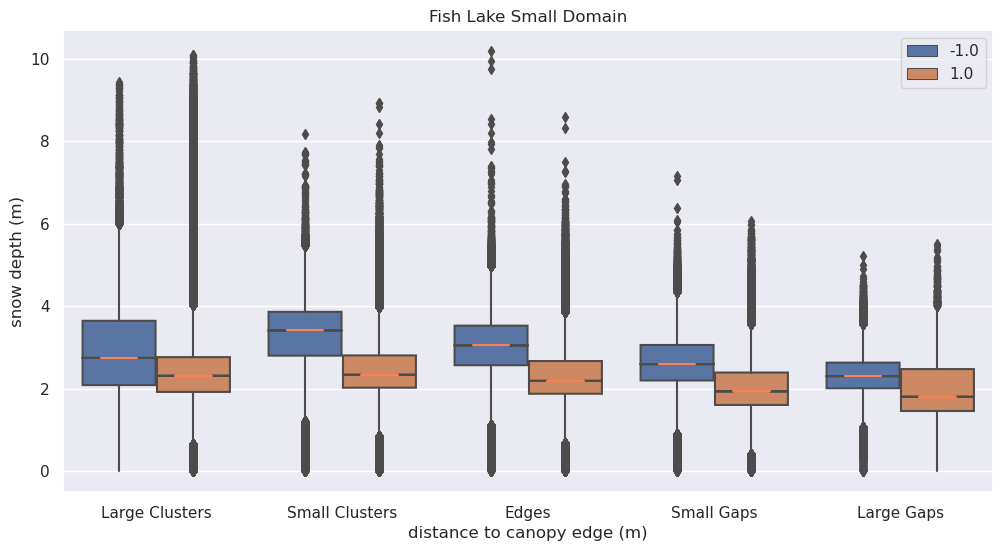

In [8]:
plt.figure(figsize=(12,6))

sns.boxplot(x=dce_reclass_flat, y=snowdepth_flat, hue=dah_reclass_flat, notch=True, showcaps=False, medianprops={"color":"coral"}) # palette={1: 'orange', -1: 'blue'})
plt.xlabel(dce_label)
plt.ylabel(snow_label)
plt.title('Fish Lake Small Domain')
plt.xticks([0,1,2,3,4], ['Large Clusters','Small Clusters','Edges','Small Gaps', 'Large Gaps'])

plt.show()

In [9]:
# fig, axes = plt.subplots(5, 1, figsize=(8,8), sharex=True, sharey=True, constrained_layout = True) #gridspec_kw={'height_ratios': [2, 2, 2, 2, 2, 2]}

# alpha1 = 0.5
# alpha2 = 0.2

# binwidth = 0.02 # snow depth into bins (2 cm?)

# sns.histplot(ax=axes[0], data=largeclusters_dahneg_flat, label='large clusters: dah < 0', color='blue', alpha=alpha1, binwidth=binwidth, kde=True)
# sns.histplot(ax=axes[0], data=largeclusters_dahpos_flat, label='large clusters: dah > 0', color='orange', alpha=alpha2, binwidth=binwidth, kde=True)

# sns.histplot(ax=axes[1], data=smallclusters_dahneg_flat, label='small clusters: dah < 0', color='blue', alpha=alpha1, binwidth=binwidth, kde=True)
# sns.histplot(ax=axes[1], data=smallclusters_dahpos_flat, label='small clusters: dah > 0', color='orange', alpha=alpha2, binwidth=binwidth, kde=True)

# sns.histplot(ax=axes[2], data=canopyedges_dahneg_flat,  label='edges: dah < 0', color='blue', alpha=alpha1, binwidth=binwidth, kde=True)
# sns.histplot(ax=axes[2], data=canopyedges_dahpos_flat,  label='edges: dah > 0', color='orange', alpha=alpha2, binwidth=binwidth, kde=True)

# sns.histplot(ax=axes[3], data=smallgaps_dahneg_flat,    label='small gaps: dah < 0', color='blue', alpha=alpha1, binwidth=binwidth, kde=True)
# sns.histplot(ax=axes[3], data=smallgaps_dahpos_flat,    label='small gaps: dah > 0', color='orange', alpha=alpha2, binwidth=binwidth, kde=True)

# sns.histplot(ax=axes[4], data=largegaps_dahneg_flat,    label='large gaps: dah < 0', color='blue', alpha=alpha1, binwidth=binwidth, kde=True)
# sns.histplot(ax=axes[4], data=largegaps_dahpos_flat,    label='large gaps: dah > 0', color='orange', alpha=alpha2, binwidth=binwidth, kde=True)


# # axes[0].set_xlim([0,1.5])
# # axes[0].set_ylim([0,3000])

# axes[4].set_xlabel('snow depth (m)')
# axes[0].set_title('histogram of dce and dah groups')

# axes[0].legend()
# axes[1].legend()
# axes[2].legend()
# axes[3].legend()
# axes[4].legend()
# plt.show()

# xDEM

In [11]:
import xdem

In [12]:
ds

<xarray.Dataset>
Dimensions:                         (x: 3725, y: 3330, band: 1)
Coordinates:
  * x                               (x) float64 1.492e+06 ... 1.503e+06
  * y                               (y) float64 8.058e+05 ... 7.958e+05
  * band                            (band) int32 1
    spatial_ref                     int32 ...
Data variables: (12/27)
    snowdepth                       (band, y, x) float32 2.346 2.107 ... 1.1
    dce                             (band, y, x) float32 2.865 3.78 ... -12.5
    dah                             (band, y, x) float32 -0.3723 ... 0.2329
    dah_reclass                     (band, y, x) float32 -1.0 -1.0 ... 1.0 1.0
    dce_reclass                     (band, y, x) float32 400.0 500.0 ... 100.0
    largeclusters                   (band, y, x) float32 ...
    ...                              ...
    canopyedges_posdah_snowdepth    (band, y, x) float32 ...
    canopyedges_negdah_snowdepth    (band, y, x) float32 ...
    smallgaps_posdah_snowdepth      (band, y, x) float32 ...
    smallgaps_negdah_snowdepth      (band, y, x) float32 ...
    largegaps_posdah_snowdepth      (band, y, x) float32 ...
    largegaps_negdah_snowdepth      (band, y, x) float32 ...

In [20]:
# # We want all the snow depth values.. for each dce group

# # Also saving these into the xarray dataframe, then else is nan for each group 
# ds['largeclusters_snowdepth'] = ds.snowdepth.where(ds.dce_reclass_2 == 100)
# ds['smallclusters_snowdepth'] = ds.snowdepth.where(ds.dce_reclass_2 == 200)
# ds['canopyedges_snowdepth']   = ds.snowdepth.where(ds.dce_reclass_2 == 300)
# ds['smallgaps_snowdepth']     = ds.snowdepth.where(ds.dce_reclass_2 == 400)
# ds['largegaps_snowdepth']     = ds.snowdepth.where(ds.dce_reclass_2 == 500)

# # And, we want (from those) where dah is positive or negative 
# ds['largeclusters_posdah_snowdepth'] = ds.snowdepth.where((ds.dah >= 0) & (ds.dce_reclass_2 == 100))
# ds['largeclusters_negdah_snowdepth'] = ds.snowdepth.where((ds.dah <  0) & (ds.dce_reclass_2 == 100))

# ds['smallclusters_posdah_snowdepth'] = ds.snowdepth.where((ds.dah >= 0) & (ds.dce_reclass_2 == 200))
# ds['smallclusters_negdah_snowdepth'] = ds.snowdepth.where((ds.dah <  0) & (ds.dce_reclass_2 == 200))

# ds['canopyedges_posdah_snowdepth']   = ds.snowdepth.where((ds.dah >= 0) & (ds.dce_reclass_2 == 300))
# ds['canopyedges_negdah_snowdepth']   = ds.snowdepth.where((ds.dah <  0) & (ds.dce_reclass_2 == 300))

# ds['smallgaps_posdah_snowdepth']     = ds.snowdepth.where((ds.dah >= 0) & (ds.dce_reclass_2 == 400))
# ds['smallgaps_negdah_snowdepth']     = ds.snowdepth.where((ds.dah <  0) & (ds.dce_reclass_2 == 400))

# ds['largegaps_posdah_snowdepth']     = ds.snowdepth.where((ds.dah >= 0) & (ds.dce_reclass_2 == 500))
# ds['largegaps_negdah_snowdepth']     = ds.snowdepth.where((ds.dah <  0) & (ds.dce_reclass_2 == 500))

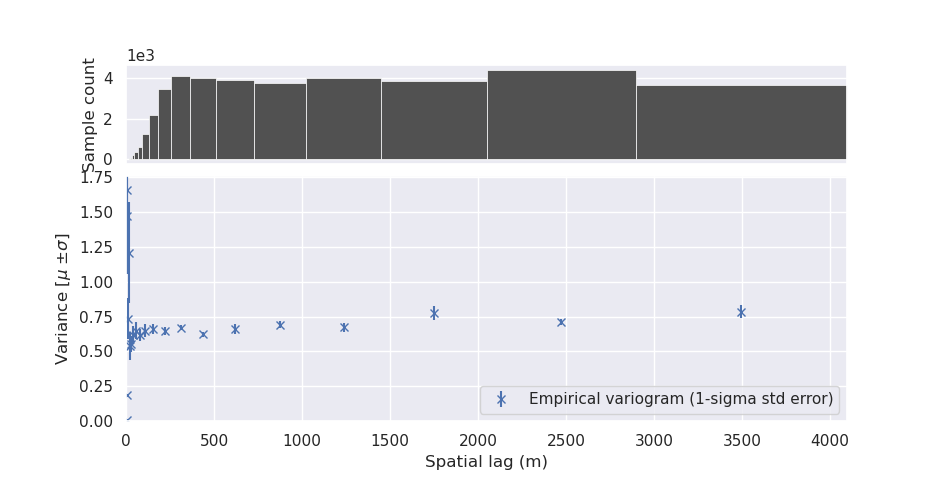

In [14]:
# for all snow depths... just to see
var_snowdepth = xdem.spatialstats.sample_empirical_variogram(
    values=ds.snowdepth.to_numpy(), gsd=1, subsample=100, n_variograms=10, random_state=42
)

xdem.spatialstats.plot_variogram(var_snowdepth)

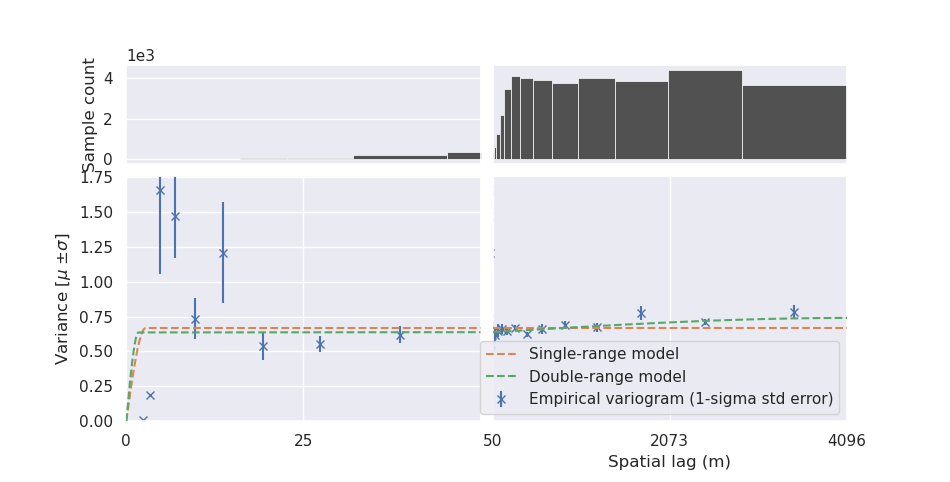

In [15]:
# var_snowdepth = xdem.spatialstats.sample_empirical_variogram(
#     values=ds.snowdepth.to_numpy(), gsd=1, subsample=1000, n_variograms=10, random_state=42
# )

data = var_snowdepth

# Create the functions
func_sum_vgm1, params_vgm1 = xdem.spatialstats.fit_sum_model_variogram(
    list_models=["Spherical"], empirical_variogram=data
)

func_sum_vgm2, params_vgm2 = xdem.spatialstats.fit_sum_model_variogram(
    list_models=["Spherical", "Spherical"], empirical_variogram=data
)

# Plot
xdem.spatialstats.plot_variogram(
    data,
    list_fit_fun=[func_sum_vgm1, func_sum_vgm2],
    list_fit_fun_label=["Single-range model", "Double-range model"],
    xscale_range_split=[50],
)

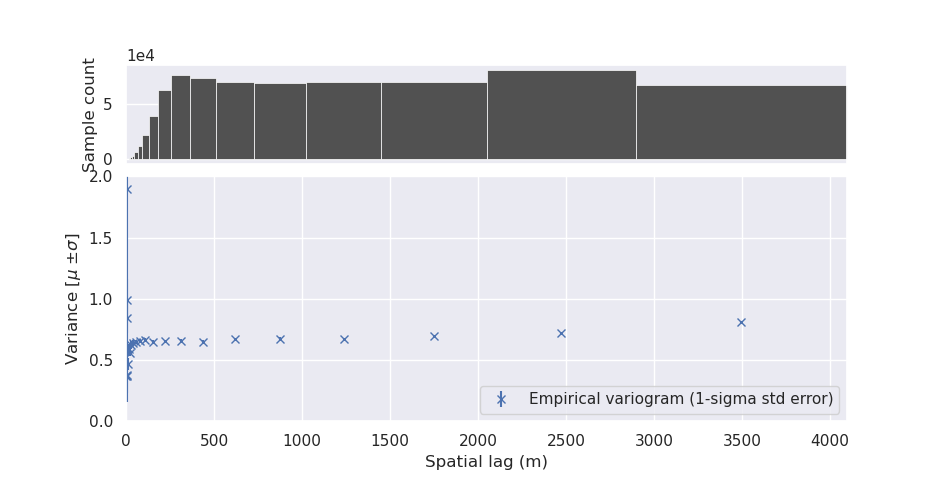

In [21]:
# for all snow depths... just to see
var_snowdepth = xdem.spatialstats.sample_empirical_variogram(
    values=ds.snowdepth.to_numpy(), gsd=1, subsample=500, n_variograms=10, random_state=42
)

xdem.spatialstats.plot_variogram(var_snowdepth)

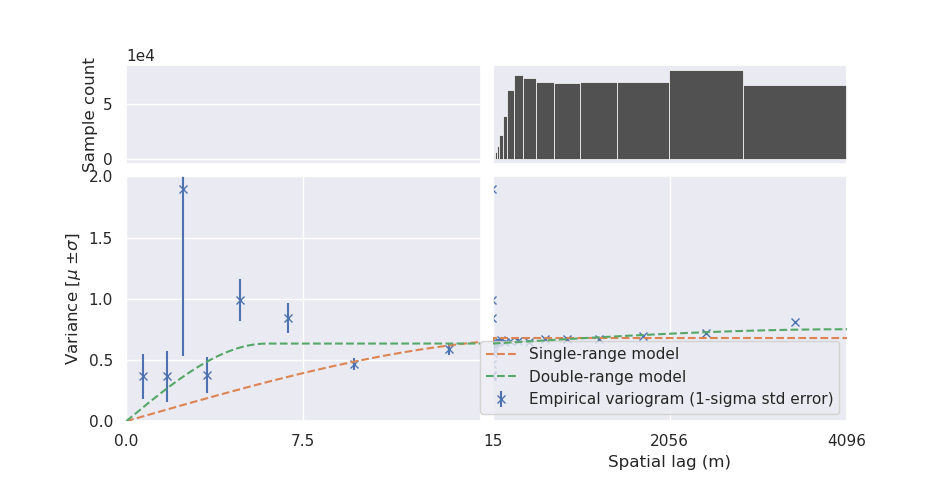

In [24]:
# var_snowdepth = xdem.spatialstats.sample_empirical_variogram(
#     values=ds.snowdepth.to_numpy(), gsd=1, subsample=1000, n_variograms=10, random_state=42
# )

data = var_snowdepth

# Create the functions
func_sum_vgm1, params_vgm1 = xdem.spatialstats.fit_sum_model_variogram(
    list_models=["Spherical"], empirical_variogram=data
)

func_sum_vgm2, params_vgm2 = xdem.spatialstats.fit_sum_model_variogram(
    list_models=["Spherical", "Spherical"], empirical_variogram=data
)

# Plot
xdem.spatialstats.plot_variogram(
    data,
    list_fit_fun=[func_sum_vgm1, func_sum_vgm2],
    list_fit_fun_label=["Single-range model", "Double-range model"],
    xscale_range_split=[15],
)

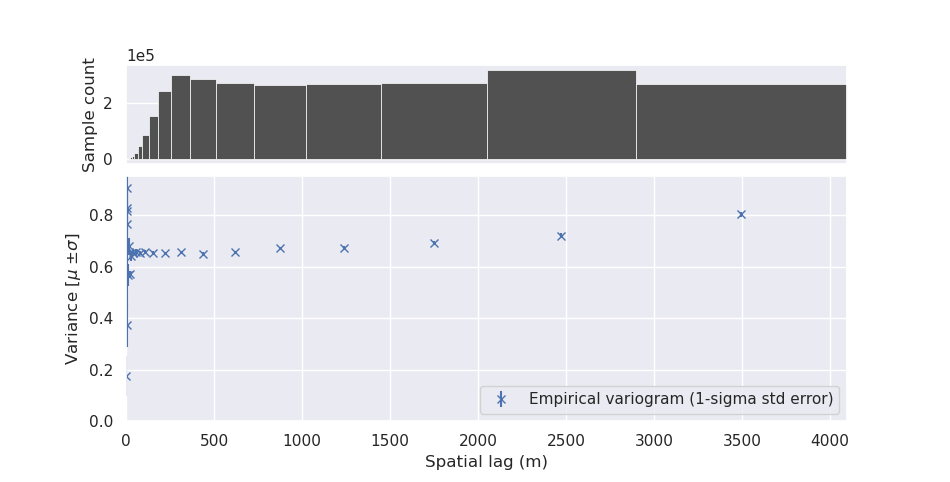

In [25]:
# for all snow depths... just to see
var_snowdepth = xdem.spatialstats.sample_empirical_variogram(
    values=ds.snowdepth.to_numpy(), gsd=1, subsample=1000, n_variograms=10, random_state=42
)

xdem.spatialstats.plot_variogram(var_snowdepth)

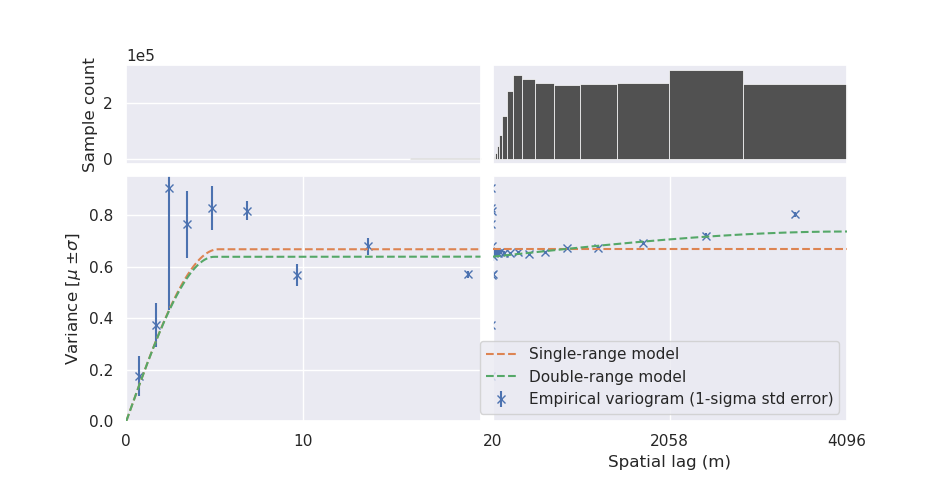

In [27]:
# var_snowdepth = xdem.spatialstats.sample_empirical_variogram(
#     values=ds.snowdepth.to_numpy(), gsd=1, subsample=1000, n_variograms=10, random_state=42
# )

data = var_snowdepth

# Create the functions
func_sum_vgm1, params_vgm1 = xdem.spatialstats.fit_sum_model_variogram(
    list_models=["Spherical"], empirical_variogram=data
)

func_sum_vgm2, params_vgm2 = xdem.spatialstats.fit_sum_model_variogram(
    list_models=["Spherical", "Spherical"], empirical_variogram=data
)

# Plot
xdem.spatialstats.plot_variogram(
    data,
    list_fit_fun=[func_sum_vgm1, func_sum_vgm2],
    list_fit_fun_label=["Single-range model", "Double-range model"],
    xscale_range_split=[20],
)